In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stats_df = pd.read_csv('csv/players_stats.csv')
stats_df.head()

,sofifa_id,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,20801,94,94,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN
1,158023,94,94,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN
2,190871,92,93,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
3,193080,91,93,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0
4,192985,91,92,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fplayers_stats = stats_df.iloc[:,[0,1,4,5,6,7]]
fplayers_stats['overall'] = round(fplayers_stats.iloc[:,2:].mean(axis=1))
fplayers_stats.head()

,sofifa_id,overall,shooting,passing,dribbling,defending
0,20801,74.0,93.0,81.0,89.0,35.0
1,158023,77.0,91.0,88.0,96.0,32.0
2,190871,74.0,84.0,83.0,95.0,32.0
3,193080,NaN,NaN,NaN,NaN,NaN
4,192985,81.0,86.0,92.0,87.0,60.0


In [4]:
fplayers_data = pd.read_csv('csv/players_data.csv')
fplayers_data.head()

,sofifa_id,short_name,long_name,age,nationality,club,team_position
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,Portugal,Juventus,LW
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,31,Argentina,FC Barcelona,RW
2,190871,Neymar Jr,Neymar da Silva Santos Junior,26,Brazil,Paris Saint-Germain,CAM
3,193080,De Gea,David De Gea Quintana,27,Spain,Manchester United,GK
4,192985,K. De Bruyne,Kevin De Bruyne,27,Belgium,Manchester City,RCM


In [5]:
fplayers_stats_r = pd.read_csv('csv/fplayer_scraps/results_clean.csv')

fplayers_stats_r.head()

,sofifa_id,mean_shooting,mean_passing,mean_dribbling,mean_defending,mean_impact,overall
0,20801.0,70.0,60.0,70.0,60.0,70.0,66.0
1,158023.0,80.0,80.0,90.0,70.0,90.0,82.0
2,190871.0,70.0,60.0,70.0,60.0,80.0,68.0
3,192985.0,50.0,60.0,70.0,70.0,80.0,66.0
4,155862.0,40.0,60.0,70.0,70.0,70.0,62.0


In [6]:
game_real_stats = pd.merge(fplayers_stats, fplayers_stats_r, on='sofifa_id')
game_real_stats = pd.merge(game_real_stats, fplayers_data.iloc[:,[0,1,3,5,6]], on='sofifa_id')
new_index = ['sofifa_id', 'short_name', 'age', 'club',	'team_position', 'overall_x', 'overall_y', 'shooting', 'mean_shooting', 'passing', 'mean_passing', 'dribbling', 'mean_dribbling', 'defending', 'mean_defending', 'mean_impact']
game_real_stats = game_real_stats[new_index] 
game_real_stats.head()

,sofifa_id,short_name,age,club,team_position,overall_x,overall_y,shooting,mean_shooting,passing,mean_passing,dribbling,mean_dribbling,defending,mean_defending,mean_impact
0,20801,Cristiano Ronaldo,33,Juventus,LW,74.0,66.0,93.0,70.0,81.0,60.0,89.0,70.0,35.0,60.0,70.0
1,158023,L. Messi,31,FC Barcelona,RW,77.0,82.0,91.0,80.0,88.0,80.0,96.0,90.0,32.0,70.0,90.0
2,190871,Neymar Jr,26,Paris Saint-Germain,CAM,74.0,68.0,84.0,70.0,83.0,60.0,95.0,70.0,32.0,60.0,80.0
3,192985,K. De Bruyne,27,Manchester City,RCM,81.0,66.0,86.0,50.0,92.0,60.0,87.0,70.0,60.0,70.0,80.0
4,155862,Sergio Ramos,32,Real Madrid,LCB,74.0,62.0,63.0,40.0,71.0,60.0,71.0,70.0,91.0,70.0,70.0


In [27]:
game_real_stats_t = game_real_stats.T

In [81]:
def line_plot(height_l, height_r):
    f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
    font = {'weight': 'bold', 'size': 22}
    ax[0].set_title(height_l, **font)
    ax[0].plot(game_real_stats['short_name'], game_real_stats[height_l])

    ax[1].set_title(height_r, **font)
    ax[1].plot(game_real_stats['short_name'], game_real_stats[height_r])

    return ax

array([<AxesSubplot:title={'center':'passing'}>,
       <AxesSubplot:title={'center':'mean_passing'}>], dtype=object)

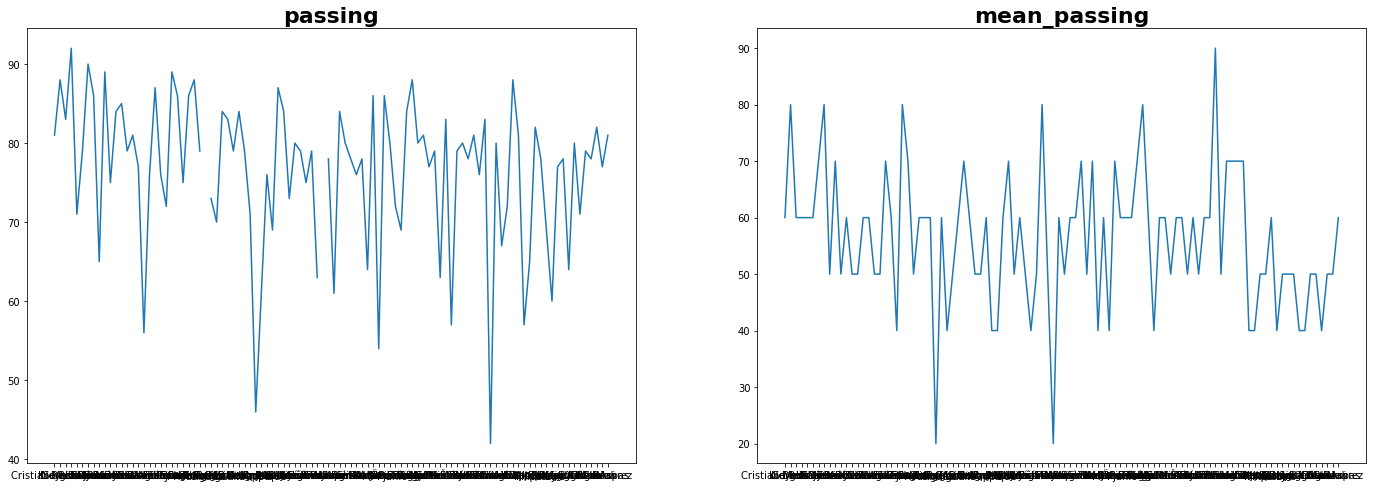

In [82]:
line_plot('passing', 'mean_passing')

In [48]:
def player_plot(player):
    f, ax = plt.subplots(1, 1, figsize=(15, 12), sharex=True)
    font = {'weight': 'bold', 'size': 22}
    ax.set_title(game_real_stats_t.iloc[1,player], **font)
    ax.set_xlabel('Specifications', fontsize=18, weight='bold')
    ax.set_ylabel('Rating', fontsize=15, weight='bold')
    
    sns.barplot(x=game_real_stats_t.index[5:15], y=game_real_stats_t.iloc[5:15,player], palette=['seagreen' if ind%2 == 0 else 'navajowhite' for ind, x in enumerate(list(game_real_stats_t.index[5:15]))])

    return ax

In [63]:
def scatter_plot(x, y, hue=False):
    f, ax = plt.subplots(1, 1, figsize=(12, 9), sharex=True)
    ax.set_xlabel(x, fontsize=18, weight='bold')
    ax.set_ylabel(y, fontsize=15, weight='bold')
    if hue != False:
        sns.scatterplot(data=game_real_stats, x=x, y=y, hue=hue)
        return ax
    if hue == False: 
        sns.scatterplot(data=game_real_stats, x=x, y=y)
        return ax